In [51]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


read the data in https://github.com/fedhere/DSPS/tree/master/HW10

In [0]:
#read data as data frame
genes = pd.read_csv("https://raw.githubusercontent.com/narayan-paudel/DSPS_EPAUDEL/master/HW10_ePaudel/kidpackgenes.csv", index_col=0)

In [53]:
genes

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# 1. explore the data. 

In [54]:
genes.head()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


In [55]:
#drop nan
genes = genes.dropna(axis=1, how='all')
(genes.isna().sum()>0).sum()

0

In [56]:
genes.describe()

,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
count,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000,4224.000000
mean,-0.094115,-0.027780,-0.001672,-0.110167,-0.047817,-0.000598,-0.043284,-0.029803,-0.055334,-0.017651,-0.030229,-0.013706,-0.023663,-0.103121,-0.088098,-0.054139,-0.002876,-0.032372,-0.016909,-0.003809,-0.042458,-0.043939,-0.023220,-0.033933,-0.038683,-0.047783,-0.023156,-0.047930,-0.017811,-0.030018,-0.020926,0.015523,0.005797,-0.071763,-0.013768,-0.020661,0.003889,-0.072878,-0.038951,-0.012304,-0.034749,-0.020242,-0.068896,-0.036699,-0.035138,-0.034969,-0.060241,-0.061428,-0.021173,-0.033599,-0.121057,-0.048510,-0.117854,-0.096178,-0.055508,-0.056013,0.007588,-0.006474,-0.027586,-0.220756,-0.020400,-0.027869,-0.008497,-0.027909,-0.033086,-0.050599,-0.023801,-0.042946,0.020522,-0.051150,0.004469,-0.001898,-0.143864,-0.002374
std,0.502677,0.340808,0.328042,0.692851,0.434918,0.348743,0.377675,0.350009,0.477607,0.353382,0.357349,0.458423,0.548218,0.589297,0.500310,0.546784,0.472823,0.395315,0.395921,0.436902,0.410235,0.445784,0.434078,0.333080,0.478327,0.492953,0.416760,0.475644,0.384636,0.386270,0.409521,0.444773,0.393139,0.624255,0.420408,0.519121,0.442212,0.429390,0.431870,0.528840,0.401199,0.459905,0.502303,0.391871,0.409209,0.443399,0.508753,0.453393,0.386390,0.424501,0.583490,0.405920,0.532086,0.564064,0.398196,0.373763,0.410327,0.432291,0.385475,0.659702,0.351325,0.344451,0.422259,0.429038,0.482347,0.410243,0.327410,0.354847,0.389799,0.401593,0.479766,0.487669,0.532901,0.346003
min,-2.205219,-1.779857,-3.072872,-3.491640,-2.479485,-2.767680,-1.807954,-1.835609,-3.214822,-2.205530,-2.969586,-3.050465,-2.917858,-3.181177,-2.069074,-2.443847,-2.939125,-2.537342,-2.928132,-2.786925,-2.996649,-3.110417,-2.933780,-2.309182,-2.283125,-2.895753,-3.055124,-2.325877,-2.817844,-2.547162,-2.730039,-2.805689,-2.365530,-3.463368,-2.913498,-3.193134,-3.083389,-2.826096,-3.115594,-3.309111,-2.517066,-3.152997,-2.439324,-3.860232,-2.786184,-2.578267,-3.632931,-2.115559,-2.544261,-3.408023,-2.650749,-2.215245,-2.440473,-2.707306,-2.096697,-2.189115,-3.551347,-3.030329,-2.257671,-3.547477,-2.572353,-2.898716,-2.360366,-3.125898,-2.946771,-3.281180,-2.787443,-1.938678,-2.932198,-3.054572,-3.189679,-2.955538,-2.909000,-1.563549
25%,-0.394770,-0.227638,-0.182975,-0.528570,-0.277542,-0.178646,-0.292570,-0.223971,-0.312487,-0.227375,-0.244387,-0.284194,-0.317263,-0.372148,-0.395844,-0.372651,-0.251957,-0.250087,-0.242332,-0.260488,-0.243780,-0.318165,-0.266188,-0.237983,-0.304092,-0.338719,-0.260898,-0.340554,-0.226021,-0.258169,-0.258578,-0.229162,-0.170977,-0.466714,-0.273969,-0.322259,-0.259066,-0.341660,-0.276331,-0.314088,-0.272306,-0.302680,-0.369546,-0.227222,-0.282149,-0.301766,-0.372967,-0.322671,-0.199928,-0.261092,-0.476621,-0.285029,-0.431509,-0.418009,-0.293508,-0.264380,-0.205578,-0.290447,-0.235940,-0.642522,-0.209206,-0.211341,-0.262162,-0.279128,-0.315895,-0.298579,-0.191197,-0.259851,-0.207651,-0.259171,-0.242053,-0.264326,-0.441299,-0.2

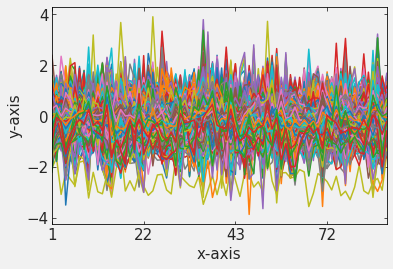

In [58]:
### Plot of dataframe
ax = genes.T.plot(legend=False);
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis");

### Figure 1: Visualization of data in data frame

# 2 preprocess the data
2.1 whiten the data (scale it) with https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [0]:
#whitening of data using preprocessing
scaledgenes = skl.preprocessing.scale(genes)

In [61]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,
        -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
         0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0., -0.,
         0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [0]:
twodproj = skl.manifold.TSNE(random_state=1).fit_transform(scaledgenes)

In [69]:
twodproj.shape

(4224, 2)

2.3 plot the TSNE projection


Text(0, 0.5, 'TSNEy')

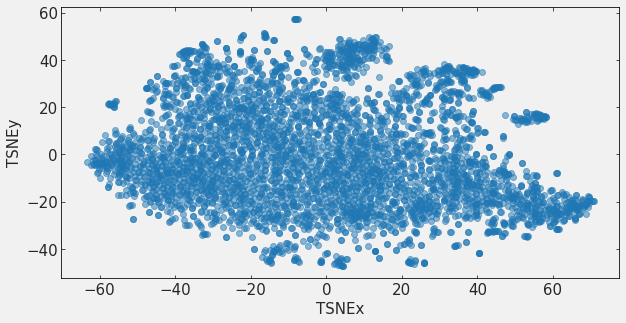

In [72]:
fig, ax  = pl.subplots(nrows=1, ncols=1, figsize=(10,5))
#cmap = cm.get_cmap('viridis', 2)
cb = ax.scatter(twodproj[:,0], twodproj[:,1], alpha = 0.5)
ax.set_xlabel('TSNEx')
ax.set_ylabel('TSNEy')
#pl.colorbar(cb)
 

### Figure 2: Plot of TSNE projection

2.4 calculate a function that measures the intracluster variance (i did it in class)

In [0]:
#function to calculate intracluster variance
def calICVar(X, labels):
  '''takes parameter X and labels and returns intracluster variance'''
  icvar = 0
  for n in np.unique(labels):
    #print (n, X[labels == n].std() ** 2)
    icvar += np.sum((X[labels == n] - X[labels == n].mean())**2)
    #X[labels == n].var() 
    print(icvar)
    return icvar

# 3 K-Means clustering
3.1 cluster the data with K-Means using 1 to 10 clusters. Calculate and plot the intracluster variance as a function of number of clusters and look for an "elbow" in the value of the intracluster variance. What is the optimal number of clusters? discuss

(10, 74)
1
312576.00000000006


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


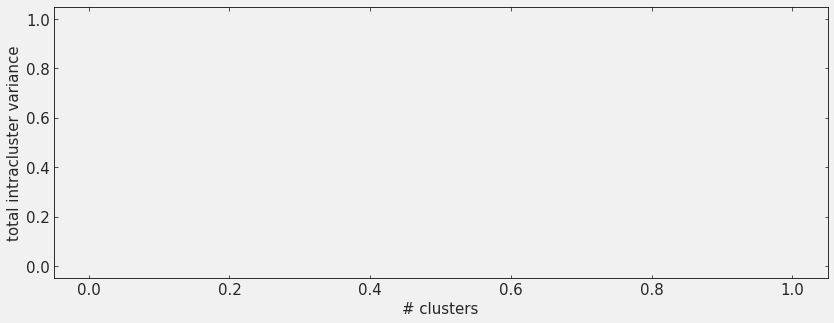

2
163748.55197411263


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


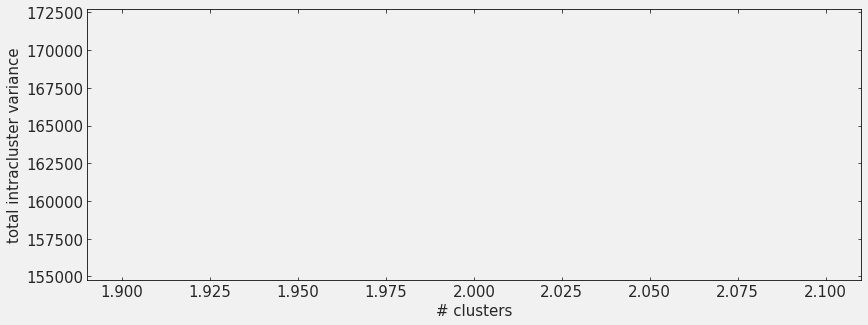

3
102840.14193282565


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


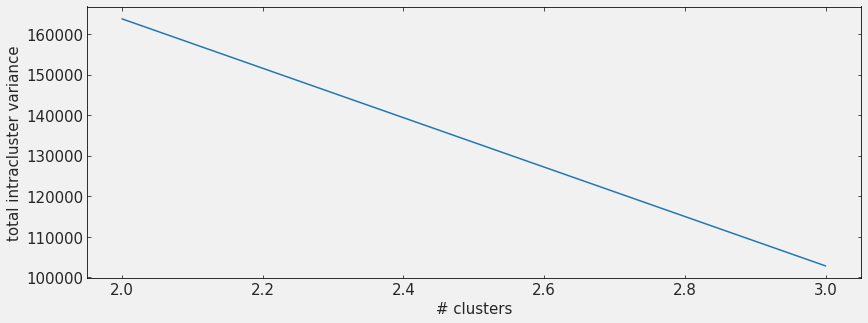

4
95934.58514059997


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


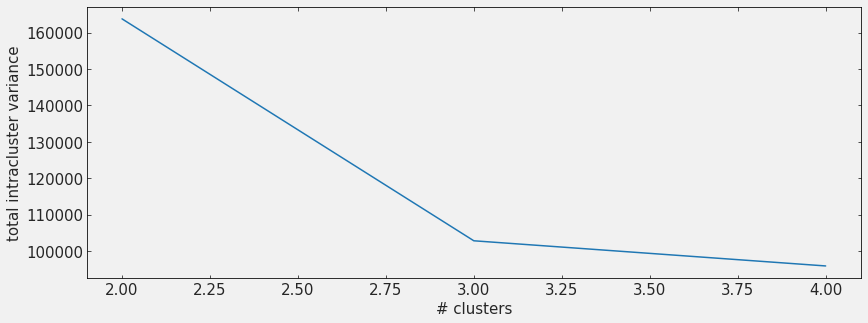

5
48066.05180233307


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


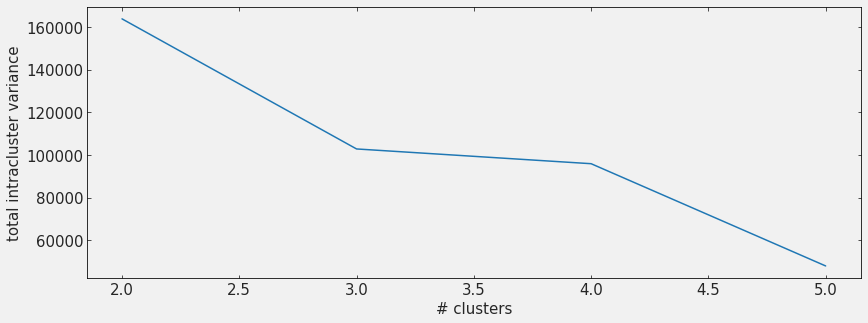

6
42958.22696659487


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


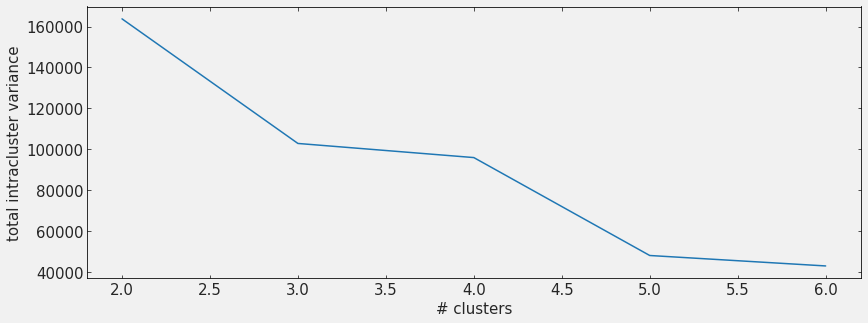

7
38654.462192488914


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


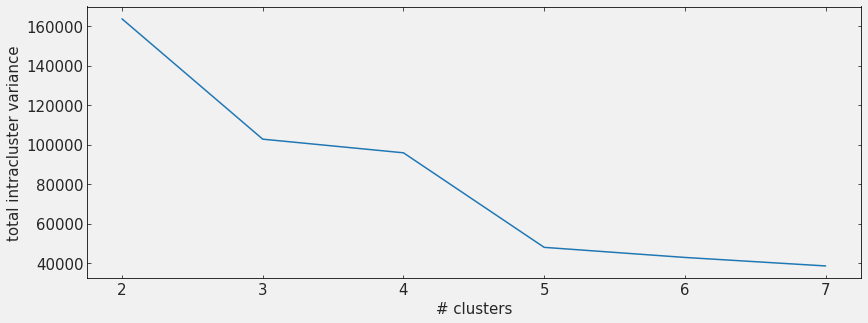

8
33260.979704219644


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


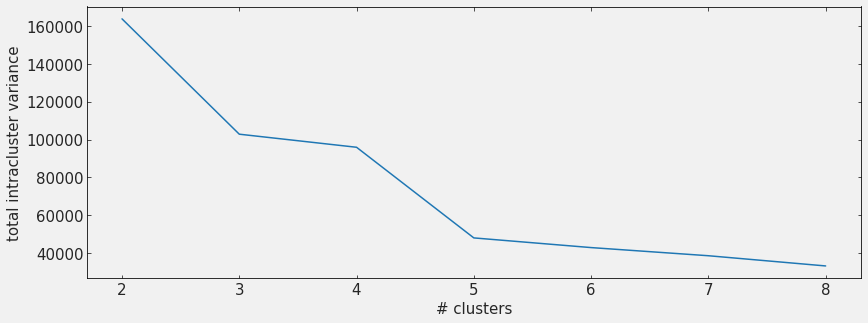

9
26382.301192111474


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


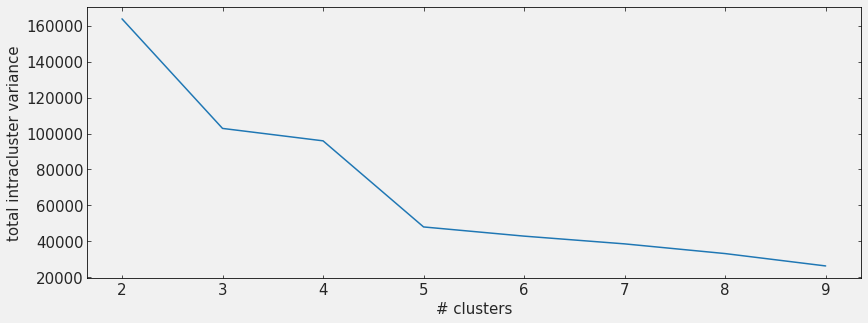

10
27769.300132968307


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


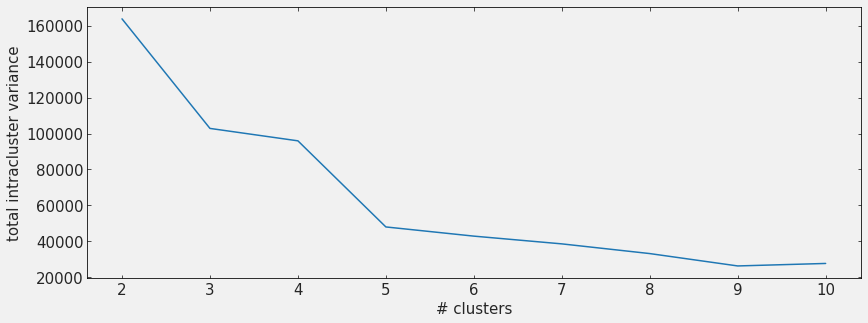

In [78]:
#calculates K-means for different number of clusters
ncmax = 10 #maximum numbers of clusters
np.random.seed(111)
centers = np.random.randn(ncmax, 74)
print(centers.shape)
ncs = np.zeros(ncmax)
cmap = cm.get_cmap('viridis', ncmax)
from sklearn import cluster
for n in range(1,ncmax+1):
    print(n)
    tmp = cluster.k_means(scaledgenes, n, init=centers[:n,:], random_state=7)
    
    ncs[n-2] = calICVar(scaledgenes, tmp[1])
    fig, ax  = pl.subplots(nrows=1, ncols=1, figsize=(10,5))

    ax.plot(range(2, n+1), ncs[:n-1])
    ax.set_xlabel('# clusters')
    ax.set_ylabel('total intracluster variance')
    fig.subplots_adjust(right=1.2)
    
    pl.show()

### For the plots of intracluster variance against number of clusters above, elbow occurs at number of cluster = 3. So, the optimal number of cluster is 3.

3.2 plot the cluster on the 2D TSNE projection colorcoded by clusters

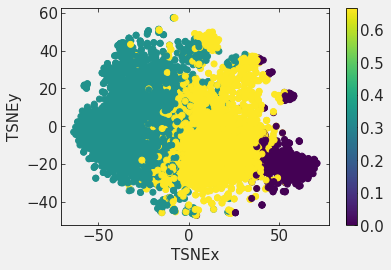

In [80]:
#scatterplot of two dimensional TSNE projection
geneclustersKM = cluster.KMeans(n_clusters=3).fit(scaledgenes)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters)
pl.xlabel('TSNEx')
pl.ylabel('TSNEy')
pl.colorbar();

### Figure: Two dimensional TDSE projection showing clusters.

# Choose to use DBSCAN or hierarchical clustering (EC also to the other method)

# 4a DBSCAN
4a.1 calculate and plot the distance matrix if you have not yet. Discuss: is there structure?

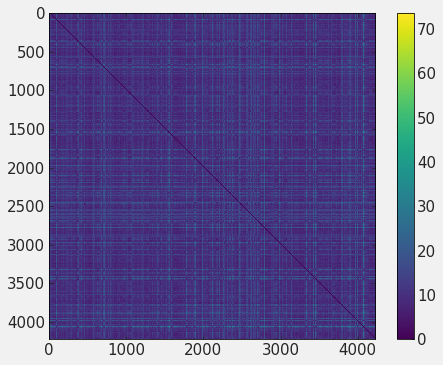

In [81]:
import scipy

SpatialDistance = scipy.spatial.distance.pdist(scaledgenes) ## distance matrix of scaledgenes
Matrix = scipy.spatial.distance.squareform(SpatialDistance) ## convert to square form
pl.figure(figsize=(8,6))
pl.imshow(Matrix)
pl.colorbar();

### Figure 3: Plot of Distance matrix.

### Grid like structures can be found in the distance matrix plot.

4a.2 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is just below the mean

pairwise distance mean =  11.470978212545768


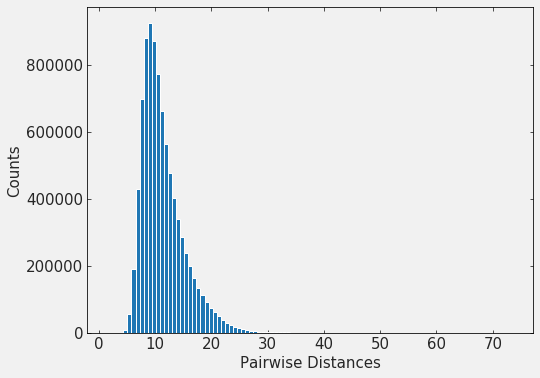

In [82]:
pairwise = scipy.spatial.distance.pdist(scaledgenes) ## Pairwise distances

pl.figure(figsize=(8,6)) 
pl.hist(pairwise, bins=100);
pl.xlabel('Pairwise Distances')
pl.ylabel('Counts');
print("pairwise distance mean = ",pairwise.mean())

### Figure 4: Histogram of pairwise distances.

4a.3 initialize the dbscan eps value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. 

4a.4 How many clusters do you have, how many outliers? is that a significant number?

In [0]:
## cluster scan packae of sklearn
dbscan = cluster.DBSCAN(eps=5, min_samples=5)
dbscan.fit(scaledgenes);

In [85]:
dbscan.labels_

array([-1, -1, -1, ...,  0,  0, -1])

In [86]:
# To get the unique entries
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4}

In [87]:
## but we also want to know outliers so we use np.unique
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]), array([2687, 1507,    5,    7,   11,    7]))

### There are six clusters and 2687 outliers.

# 4b Agglomerative clustering
 4b.1 cluster the data with the ward linkage


In [0]:
### initializing and fitting
aggcluster = cluster.AgglomerativeClustering(linkage='ward')
aggclusterfit = aggcluster.fit(scaledgenes)

4b.2 calculate the linkage and plot the dendrogram of the clusters  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html


In [0]:
from scipy.cluster.hierarchy import dendrogram, linkage

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


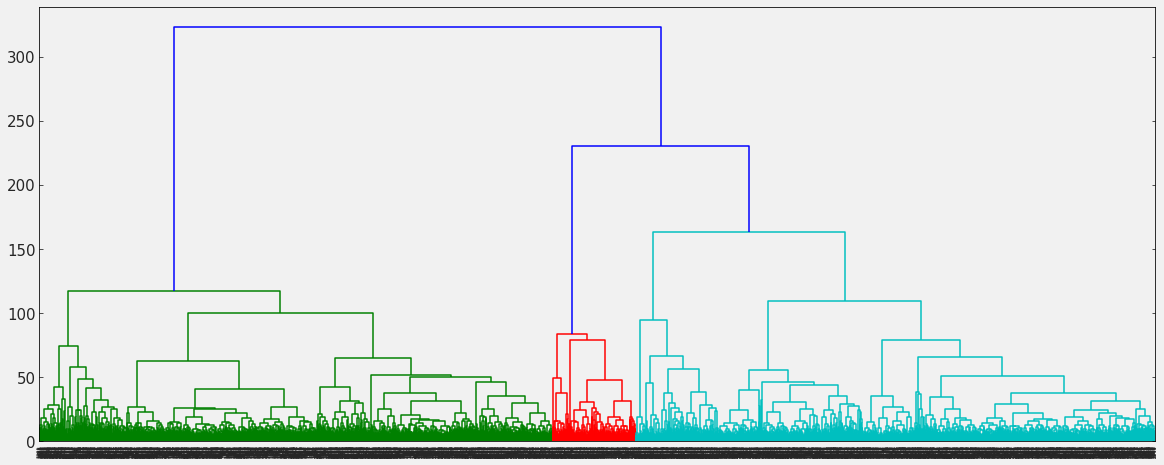

In [90]:
## ward linkage
fig = plt.figure(figsize=(20, 8))
figdnd = dendrogram(linkage(scaledgenes, 'ward'));

### Figure 5: Plot of dendogram of the cluster with linkage "ward".

4b.3 repeat with a different linkage and comment on differences

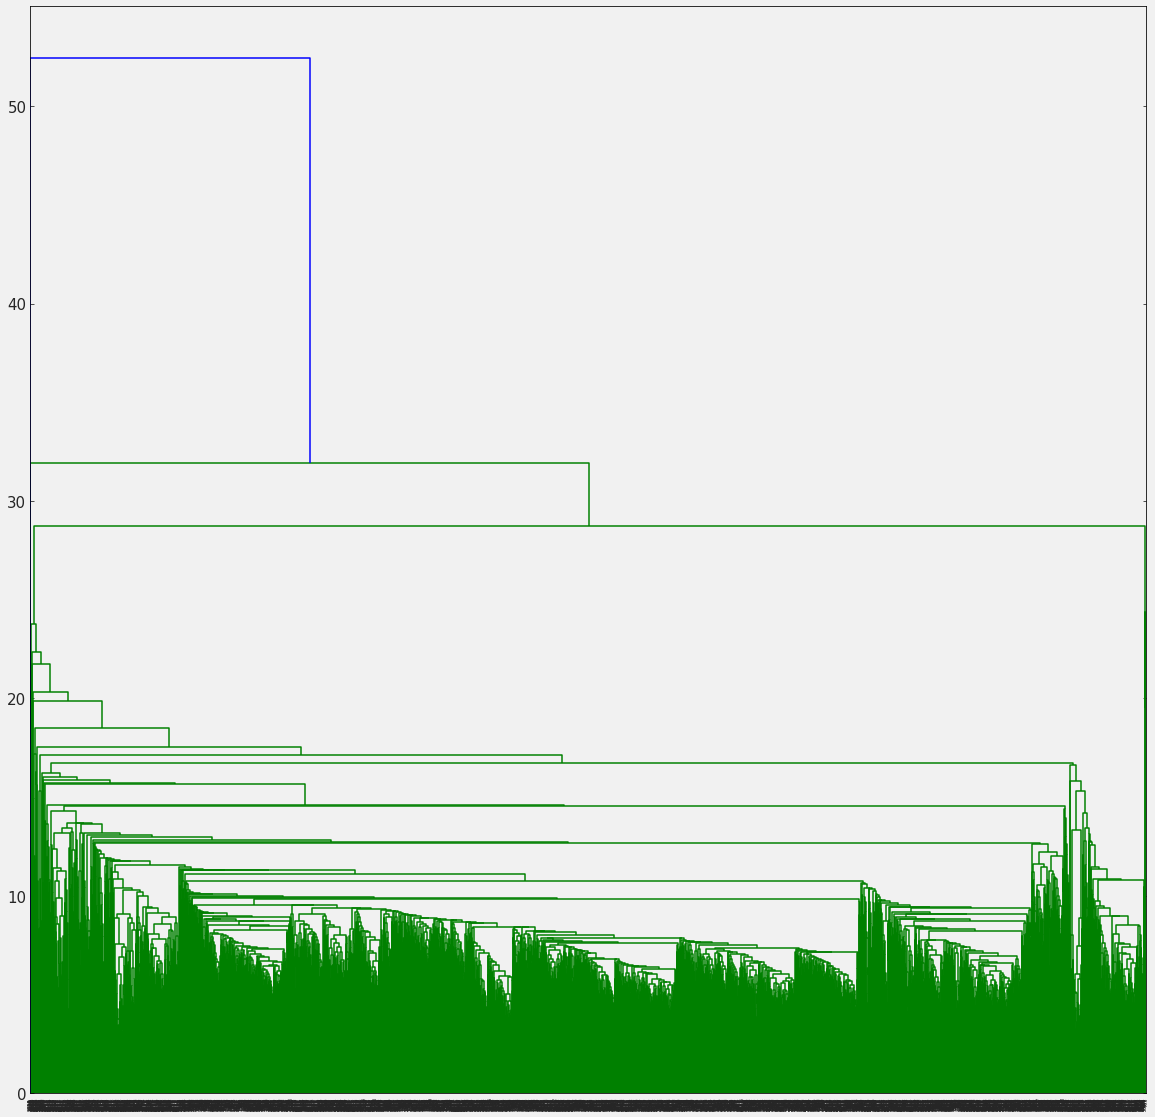

In [92]:
## weighted linkage
fig = plt.figure(figsize=(20, 20))
figdnd = dendrogram(linkage(scaledgenes, 'average'))

### Figure 5: Plot of dendrogram of cluster with linkage "average".

4b.4 rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means. plot the 2D TSNE projection colorcoded as before.

In [0]:
# The appropriate number of clusters we found were 3 so we will use that
aggcluster = cluster.AgglomerativeClustering(linkage='ward', n_clusters=3)
geneclustersAg = aggcluster.fit(scaledgenes)

In [94]:
geneclustersAg.labels_

array([0, 0, 0, ..., 1, 0, 0])

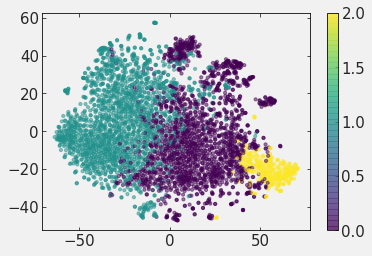

In [95]:
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersAg.labels_, alpha=0.5, s=10)
cbar = pl.colorbar();

### Figure 6: AgglomerativeClustering using three cluster which were the appropriate to use as we found above.

# EC, 667: do the other method as well: agglomerative if you used DBSCAn, DBSCAN if you used agglomerative


### We already fit the data with both the methods above. so we can just plot the DBSCAN here.

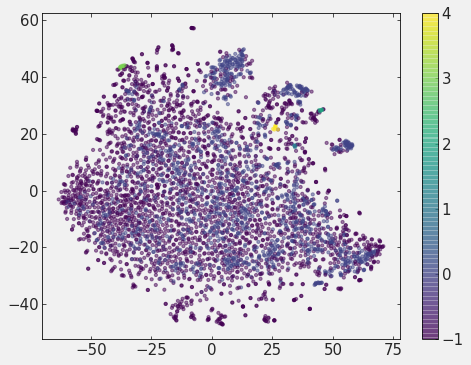

In [96]:
## For DBSCAN
pl.figure(figsize=(8,6))
pl.scatter(twodproj[:,0], twodproj[:,1], c=dbscan.labels_, alpha=0.5, s=10)
cbar = pl.colorbar();

### Figure 7:  DBSCAN clustering projected on 2D plot.